# ASSIGNMENT 4

In [42]:
# Usual Imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
import os

In [43]:
train_data = pd.read_csv('../data/train_data.csv')
print("Train Data Shape:"+ str(train_data.shape))
train_data.head()

Train Data Shape:(507, 148)


,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


In [44]:
test_data = pd.read_csv('../data/test_data.csv')
print("Test Data Shape:"+ str(test_data.shape))
test_data.head()

Test Data Shape:(168, 148)


,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [45]:
test_data['class'].unique()

array(['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ',
       'shadow ', 'soil ', 'pool '], dtype=object)

In [46]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [47]:
y_train = train_data['class']
y_test = test_data['class']
X_train = train_data.drop(['class'],axis=1).to_numpy()
X_test = test_data.drop(['class'],axis=1).to_numpy()

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
def plot_model(cnf,cfr,batch,coeff=None,feature_importance=True):

    group_names = ['car ', 'concrete ', 'tree ', 'building ', 'asphalt ', 'grass ','shadow ', 'soil ', 'pool ']
    group_names = np.tile(group_names,(9,1))
    group_names = group_names.flatten()
    group_percentages = ["{0:.2%}".format(value) for value in
                         cnf.flatten()/np.sum(cnf)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(9,9)
    cnf = cnf/np.sum(cnf) 
    cfr = pd.DataFrame(cfr).transpose()
    cfr = cfr[['precision', 'recall', 'f1-score','support']]
    if feature_importance == False:
        fig_n, axe = plt.subplots(1, 2, figsize=(30, 6))
        confusion_matrix_plots = sns.heatmap(cnf, annot=labels, fmt='', cmap='flare',ax=axe[0])
        class_report_plots = sns.heatmap(cfr,cmap='flare',annot=cfr,ax=axe[1],fmt='g')
        axe[0].set_title("Confusion Matrix for: "+batch)
        axe[1].set_title("Classification Report for: "+batch)
    else:
        fig_n, axe = plt.subplots(2, 2, figsize=(30, 15))
        confusion_matrix_plots = sns.heatmap(cnf, annot=labels, fmt='', cmap='flare',ax=axe[0][0])
        class_report_plots = sns.heatmap(cfr,cmap='flare',annot=cfr,ax=axe[0][1],fmt='g')
        axe[0][0].set_title("Confusion Matrix for: "+batch)
        axe[0][1].set_title("Classification Report for: "+batch)
        coeffs = sns.barplot(coeff.iloc[0:5],y="Feature Names",x="Coefficient Value",ax=axe[1][0],palette="flare")
        axe[1][0].set_title("Top 5 Co-Efficients for: "+batch)

        
    

def model_results(model,X_train,X_test,y_train,y_test,column_names,grid_search=False,parameters=None,feature_importance=True):
    
    if grid_search == True and parameters != None:
        print("Grid Search")
        gscv = GridSearchCV(model,param_grid=parameters,cv=5,n_jobs=os.cpu_count())
        gscv.fit(X_train, y_train)
        y_train_pred = gscv.predict(X_train)
        y_test_pred = gscv.predict(X_test)
        model = gscv.best_estimator_
        params = gscv.best_params_
    else:
        print("Standard Model")
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        params = None
    coeff_table = pd.DataFrame()
    if feature_importance == True:
        feature_values = model.feature_importances_
        coeff_table = pd.DataFrame({"Feature Names": column_names, "Coefficient Value": abs(feature_values)})
        coeff_table = coeff_table.sort_values(by=['Coefficient Value'],ascending=False)
    
    plot_model(confusion_matrix(y_train, y_train_pred),classification_report(y_train, y_train_pred,output_dict=True),"Train",coeff_table,feature_importance)
    plot_model(confusion_matrix(y_test, y_test_pred),classification_report(y_test, y_test_pred,output_dict=True),"Test",coeff_table,feature_importance)

    return model,params

In [50]:
column_names = [x for x in test_data.columns if x != 'class']

### Random Forest

Standard Model


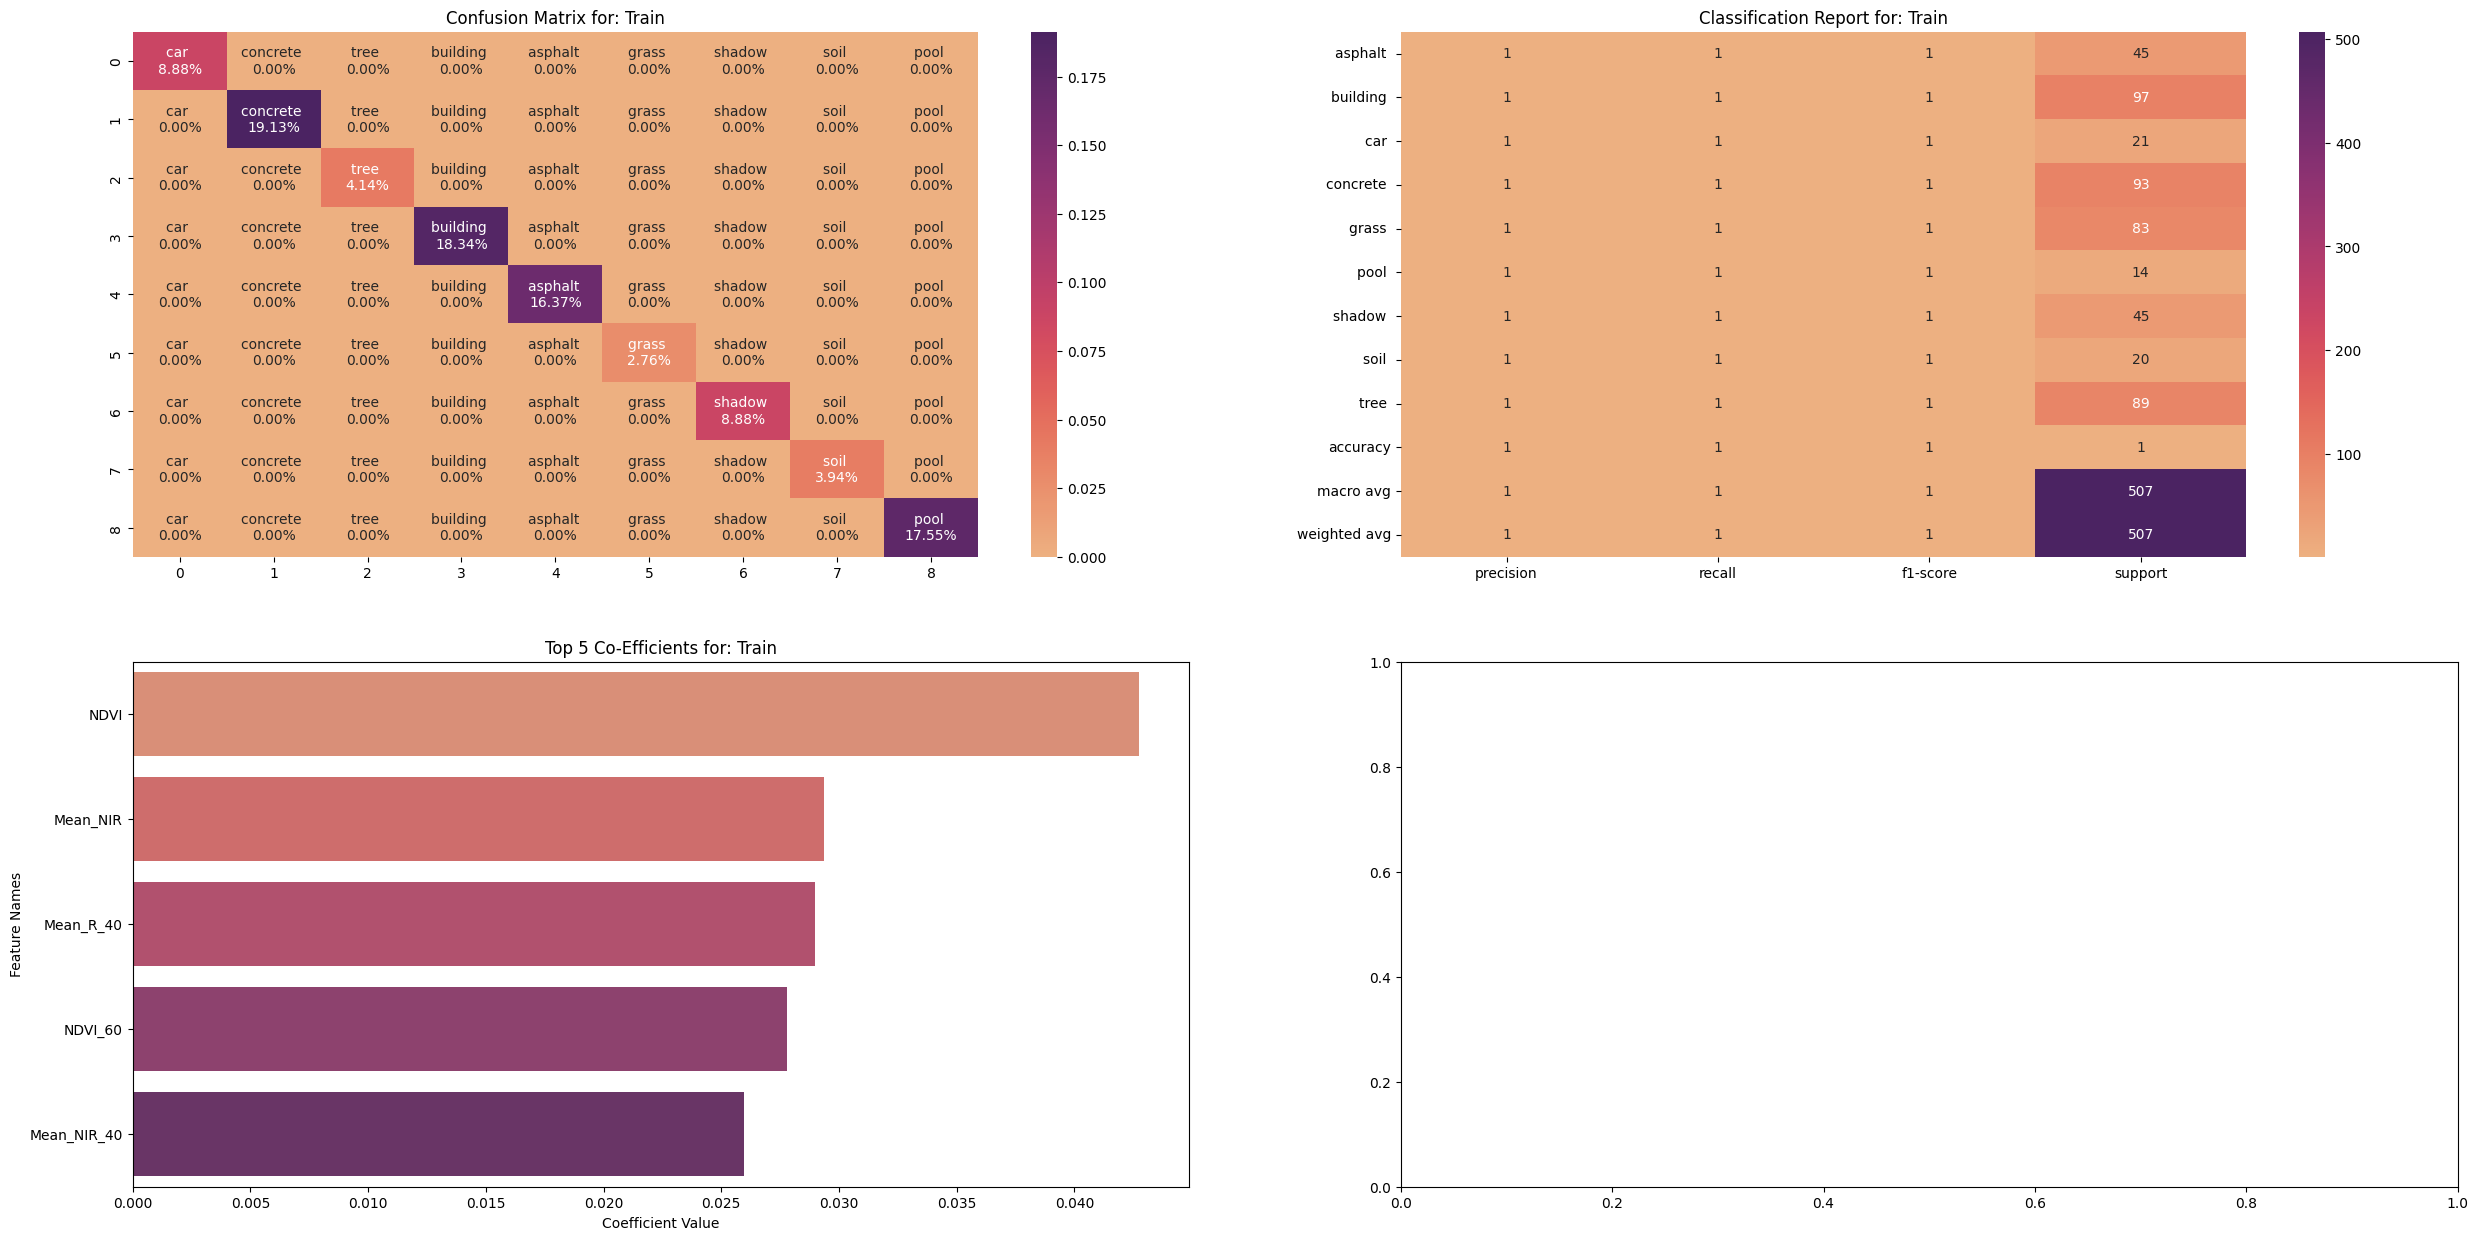

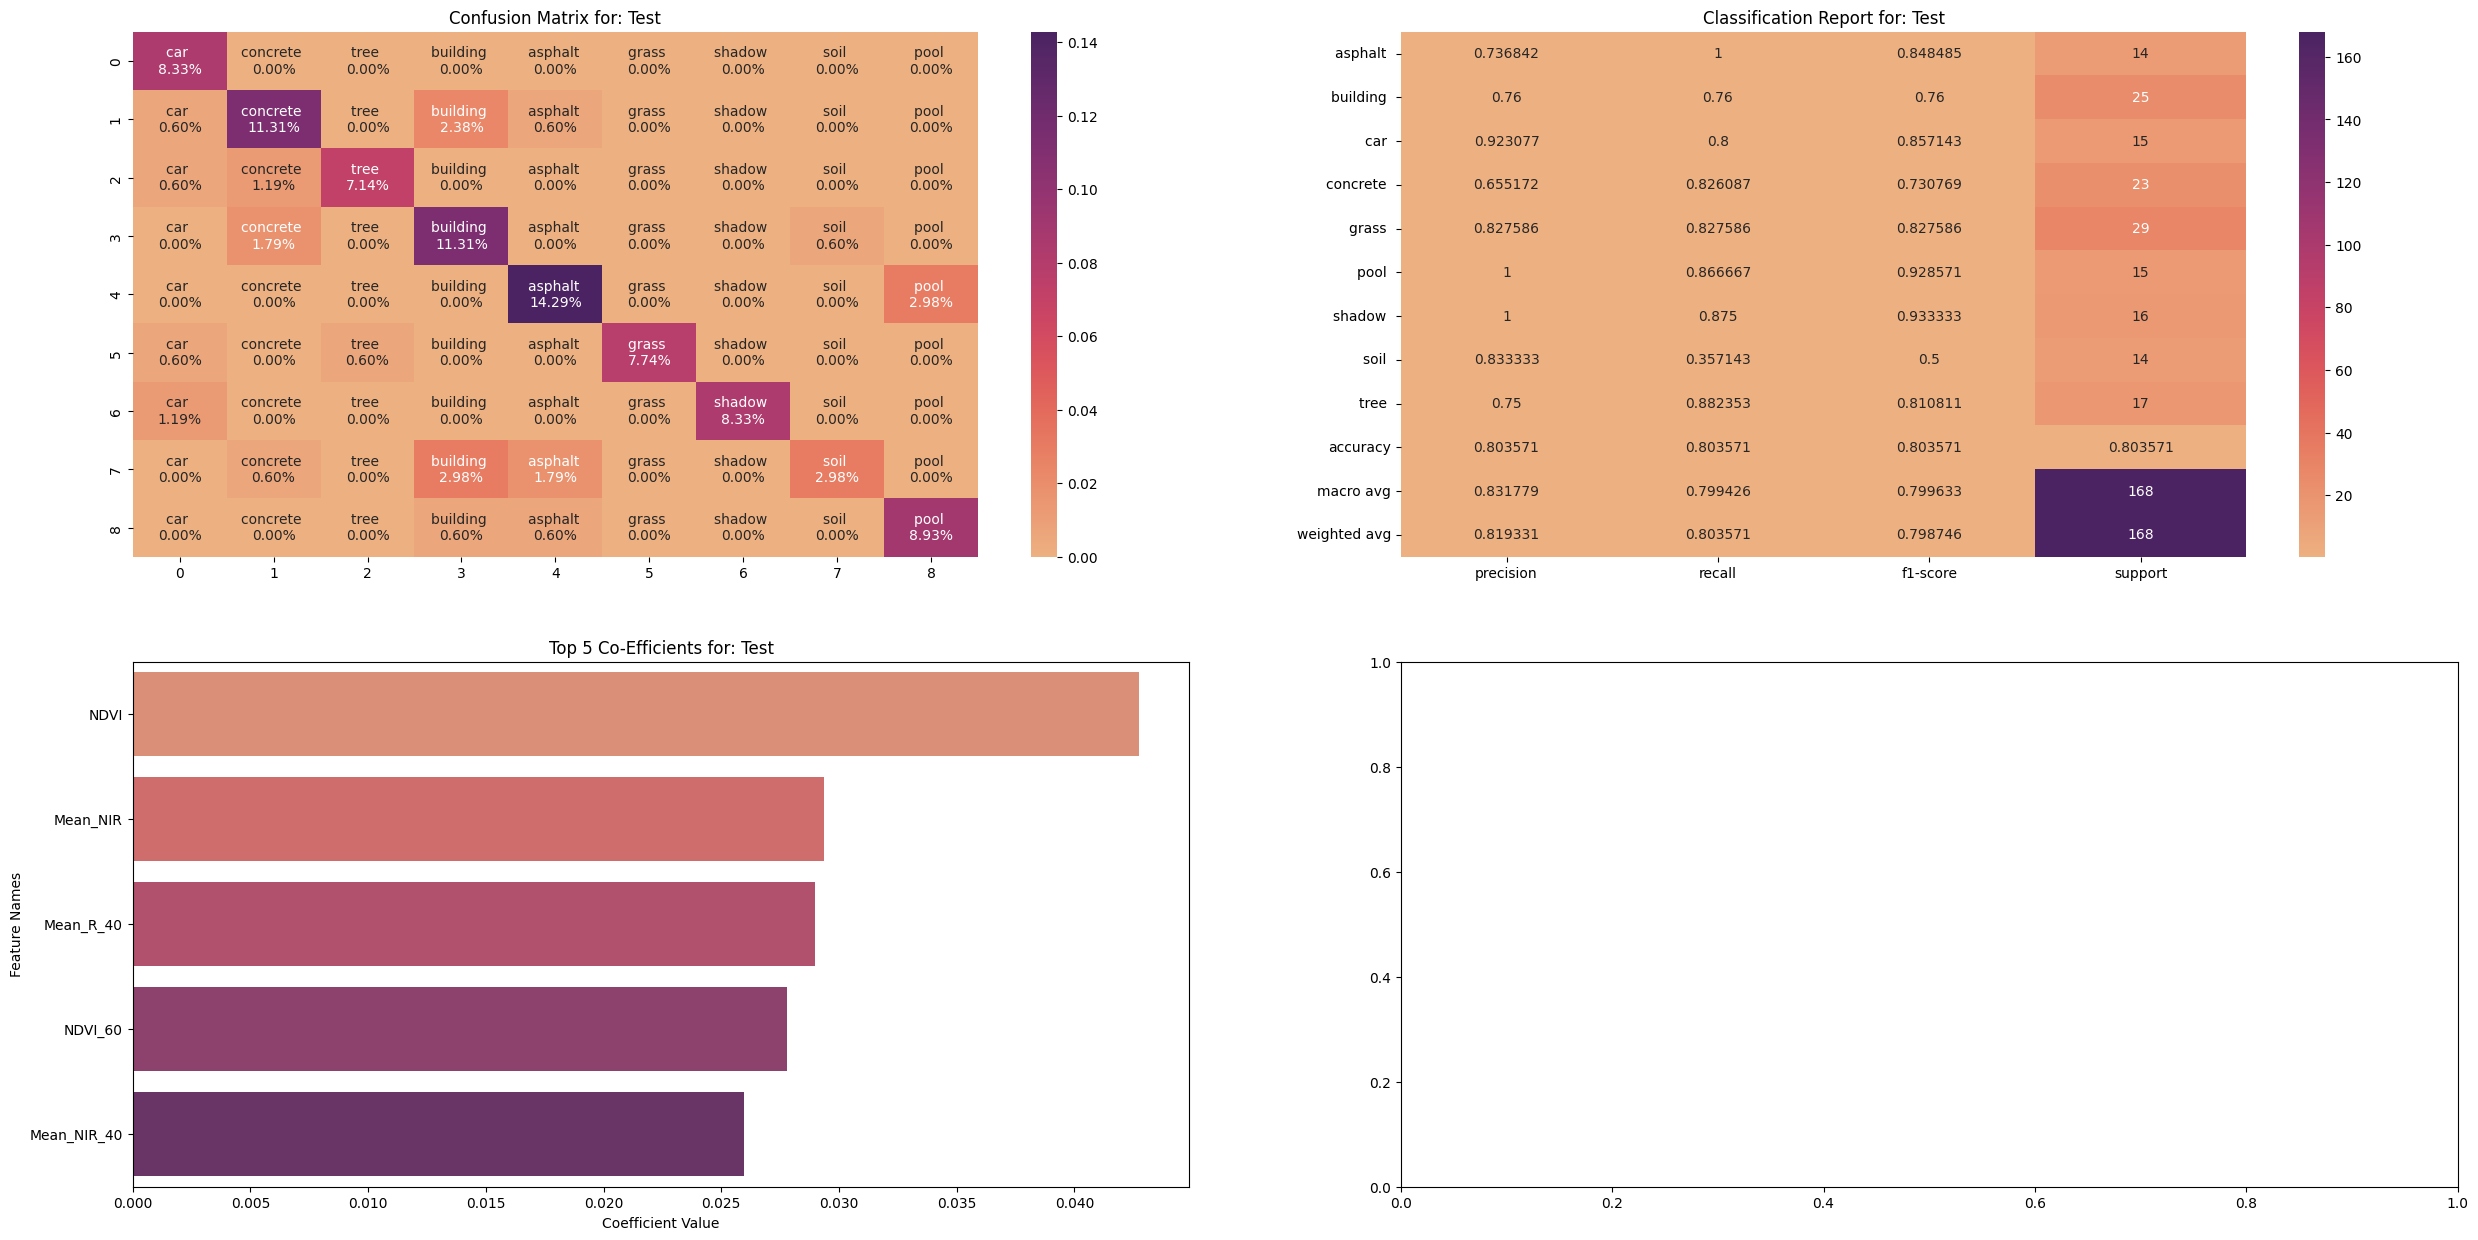

In [51]:
rfc,rfc_params = model_results(RandomForestClassifier(n_jobs=(math.floor(os.cpu_count()*0.7)),random_state=42),X_train_scaled,X_test_scaled,y_train,y_test,column_names)

It looks like the model is overfitting.

### Linear SVC

Standard Model


c:\Users\yomaa\Documents\Environments\everything\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


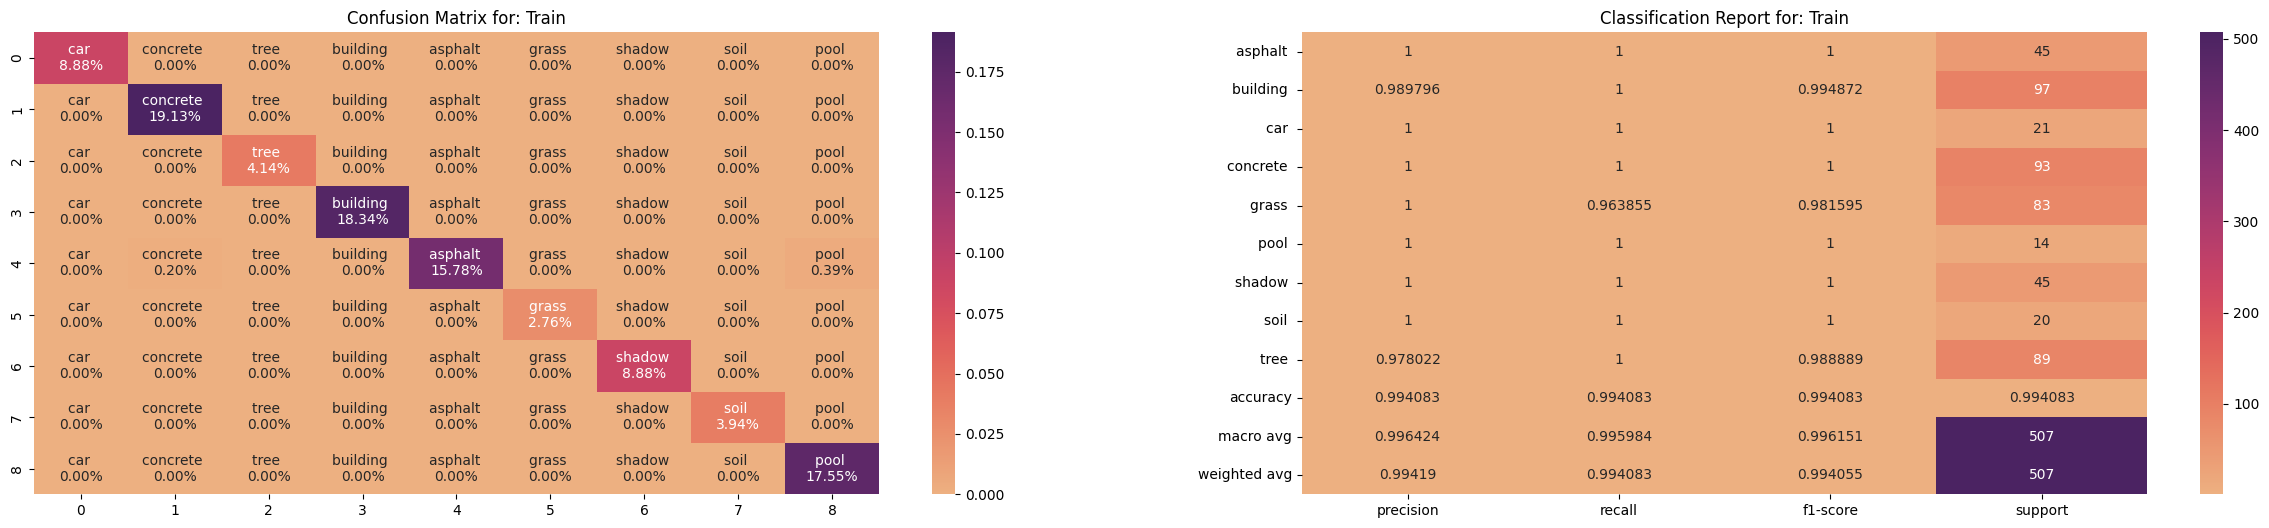

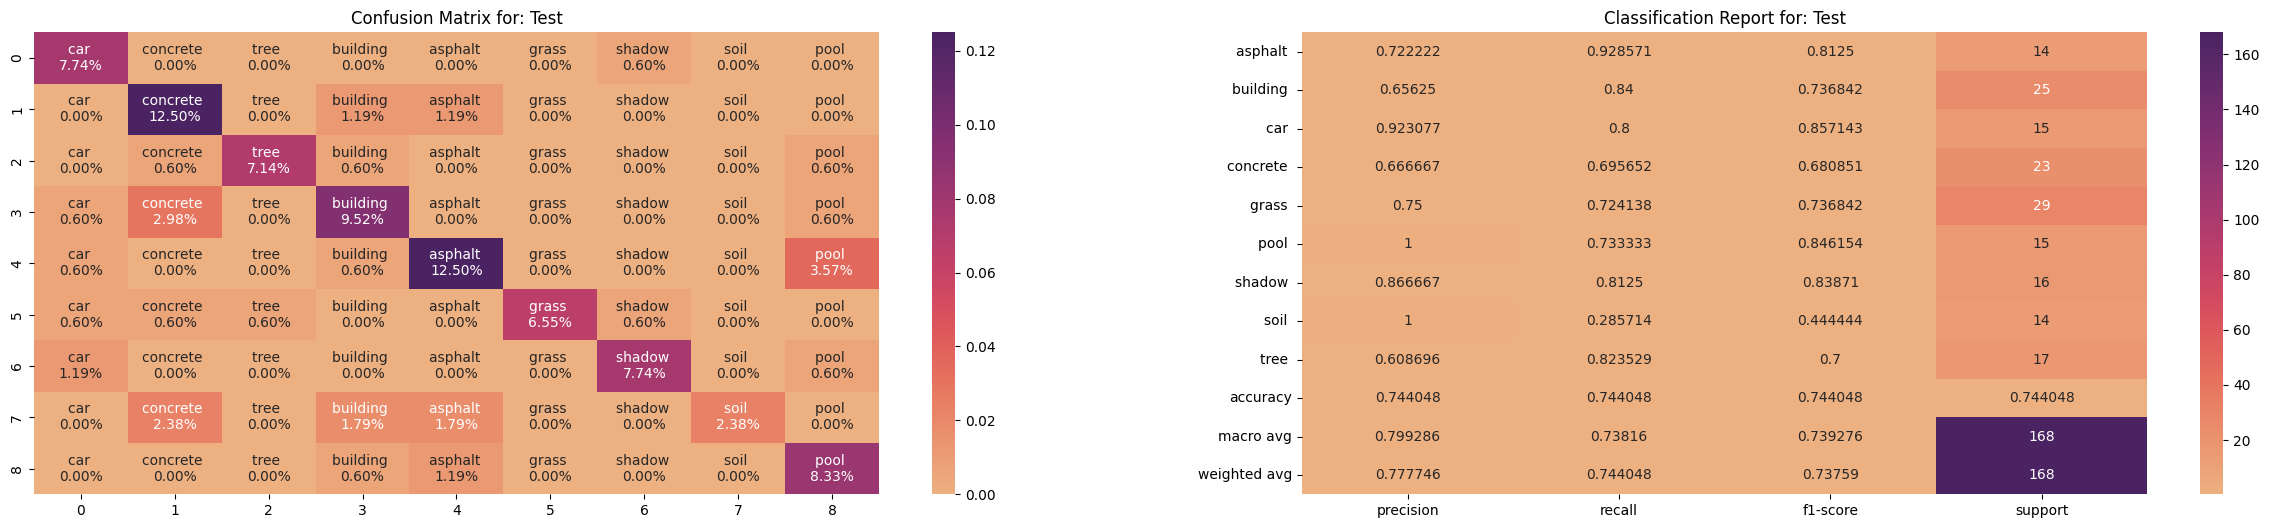

In [52]:
lsvc,lsvc_params = model_results(LinearSVC(random_state=42),X_train_scaled,X_test_scaled,y_train,y_test,column_names,feature_importance=False)

It looks like the model is overfitting.

### SVM with a linear kernel

Grid Search


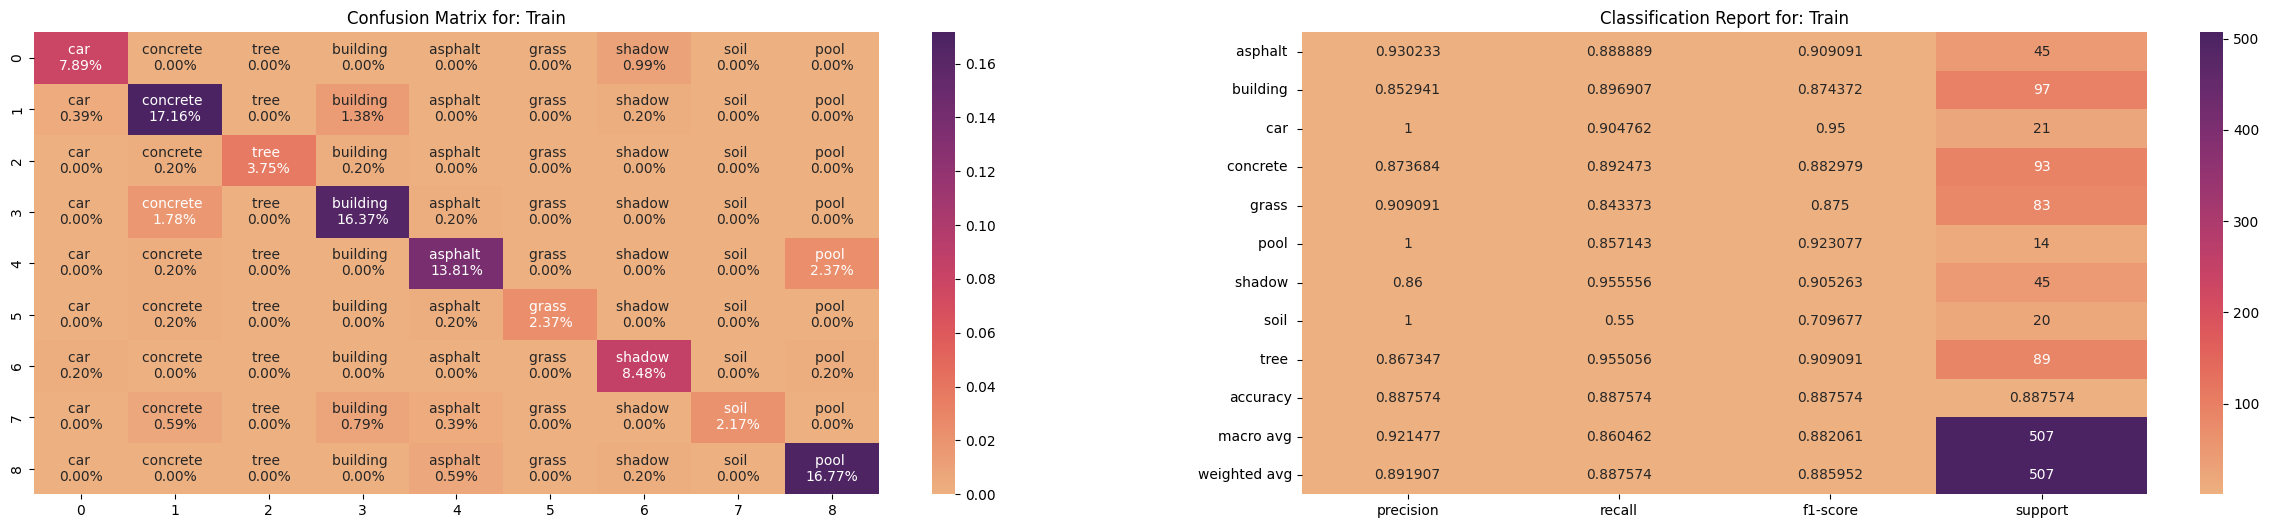

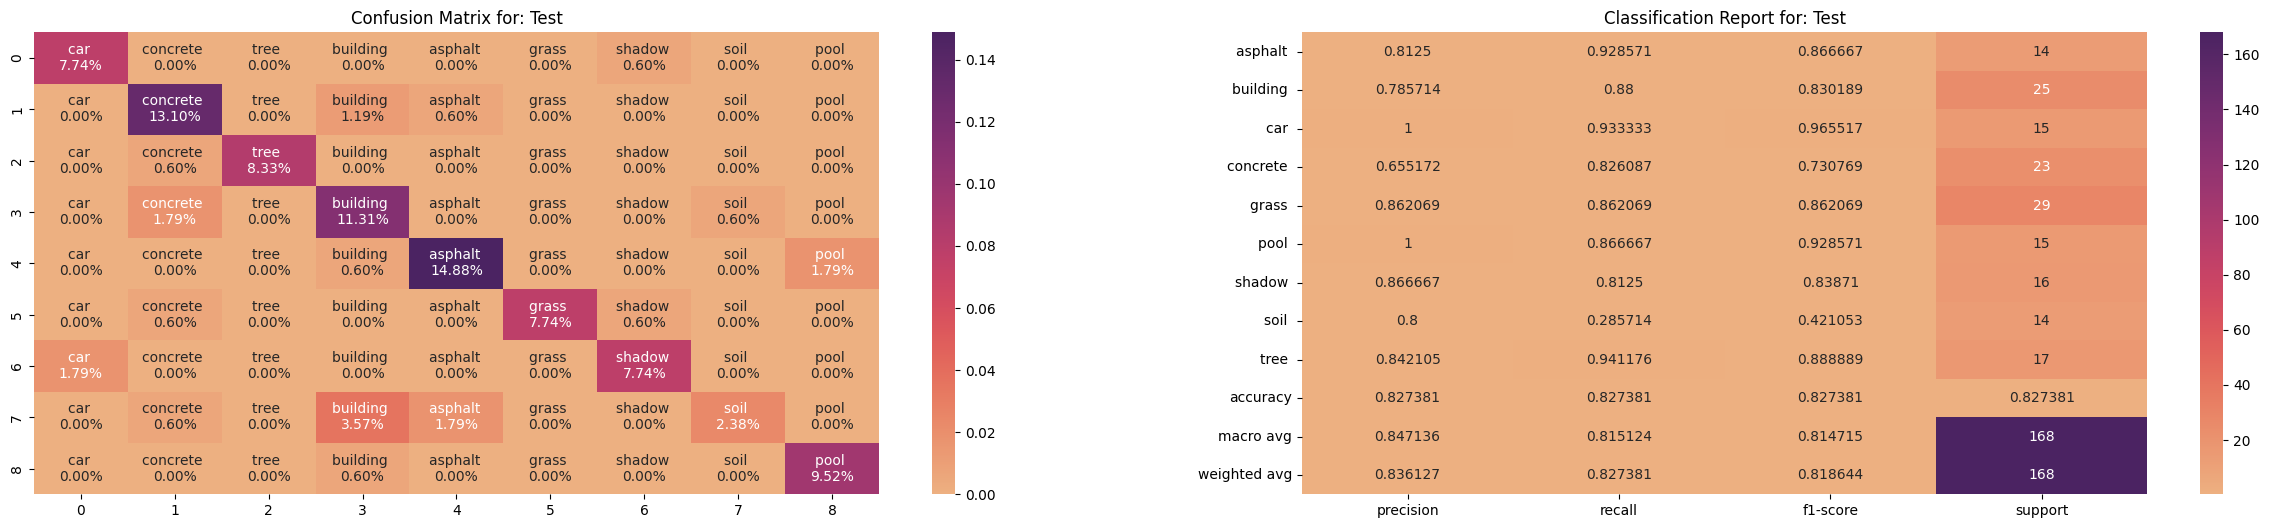

In [53]:
linearsvm,linearsvm_params = model_results(SVC(kernel='linear',random_state=42),X_train_scaled,X_test_scaled,y_train,y_test,column_names,grid_search=True,parameters=[{"C":np.arange(0.01,10.2,0.2)}],feature_importance=False)

It looks like the model is not overfitting.

In [54]:
linearsvm_params

{'C': 0.01}

### SVM with Polynomial Kernel

Grid Search


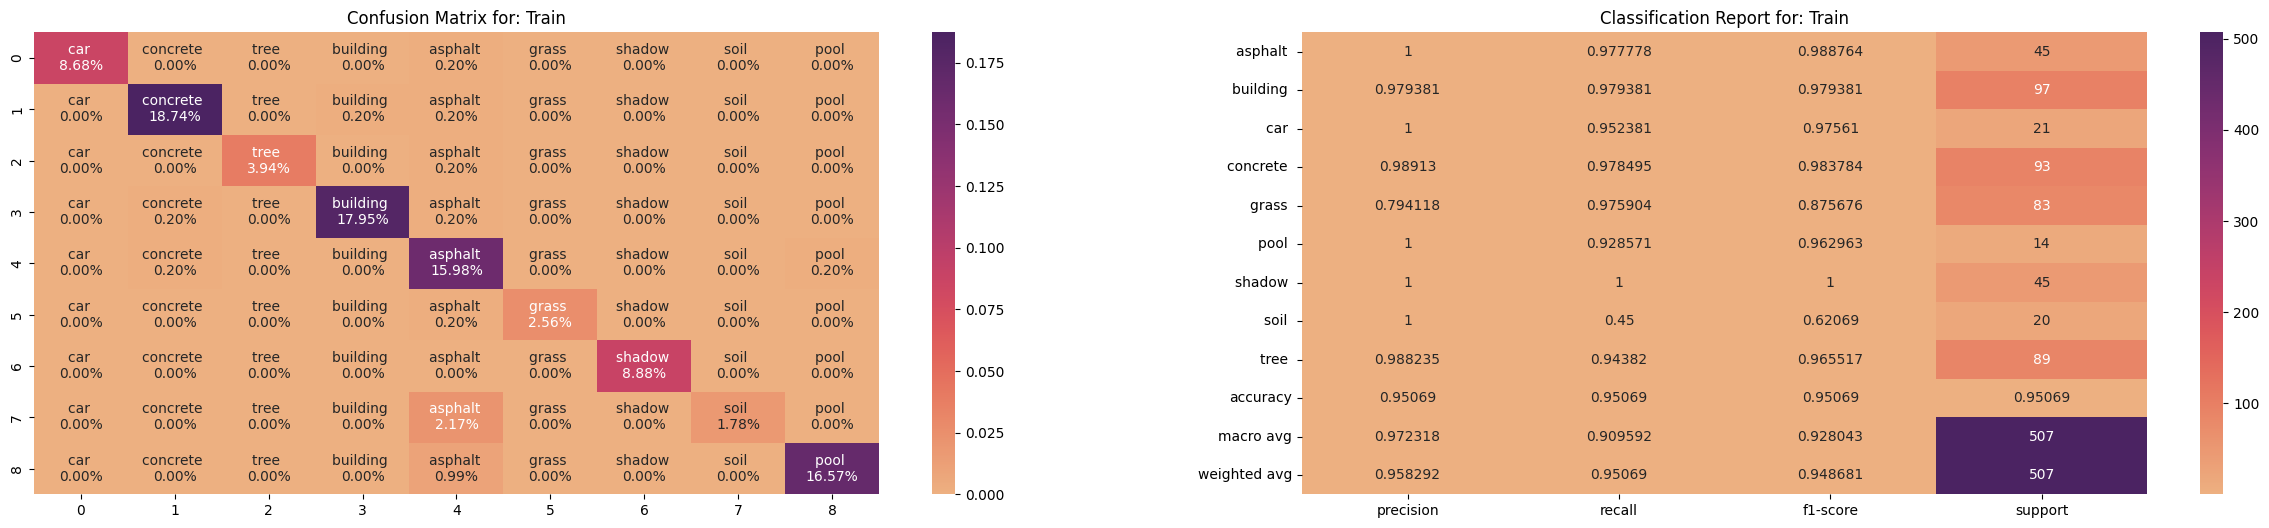

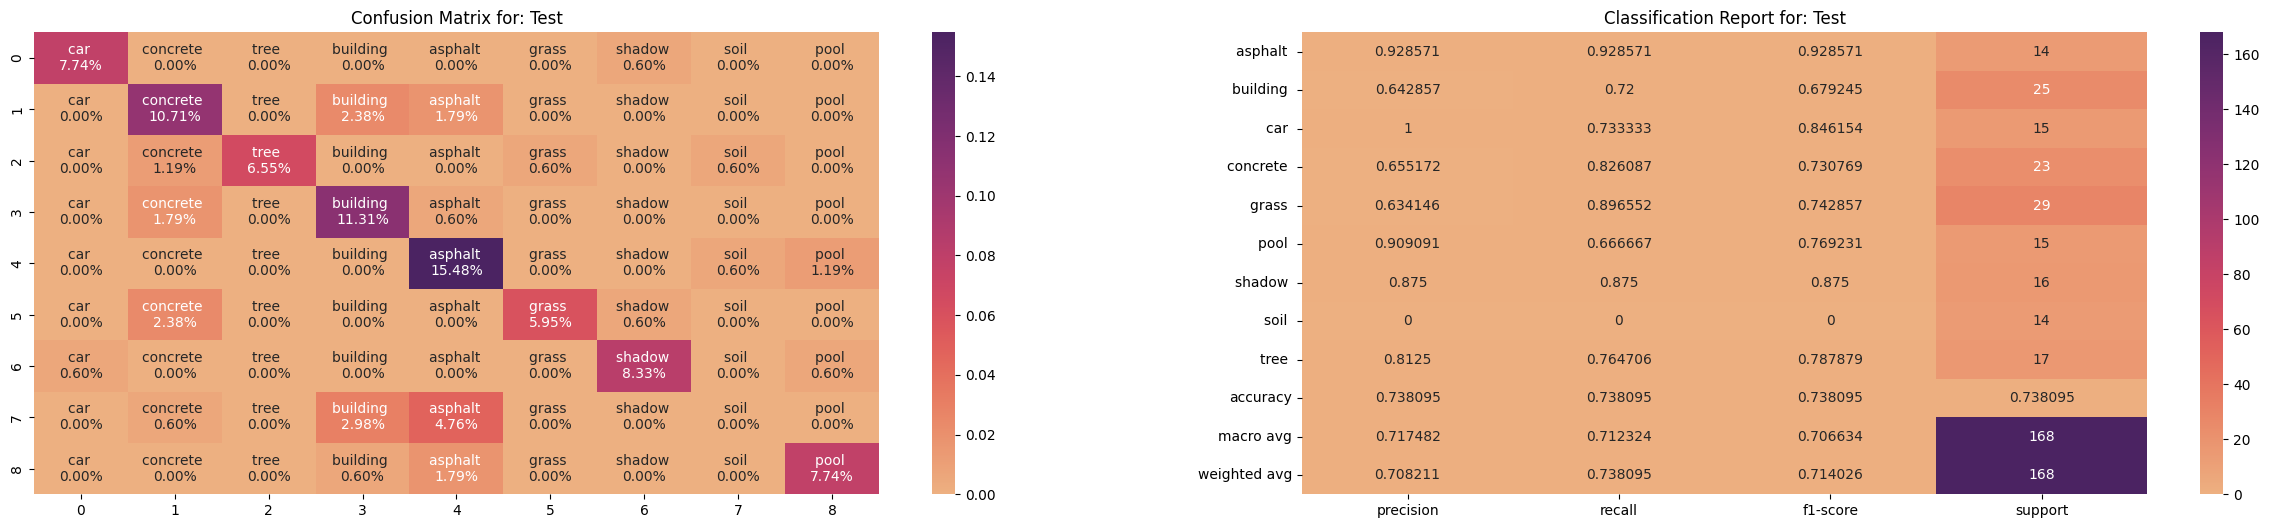

In [55]:
polysvm,polysvm_params = model_results(SVC(kernel='poly',random_state=42),X_train_scaled,X_test_scaled,y_train,y_test,column_names,grid_search=True,parameters=[{"C":np.arange(0.01,10.2,0.2),'degree':[2,3,4,5,6]}],feature_importance=False)

It looks like the model is overfitting.

In [56]:
polysvm_params

{'C': 3.81, 'degree': 3}

### SVM with RBF kernel

Grid Search


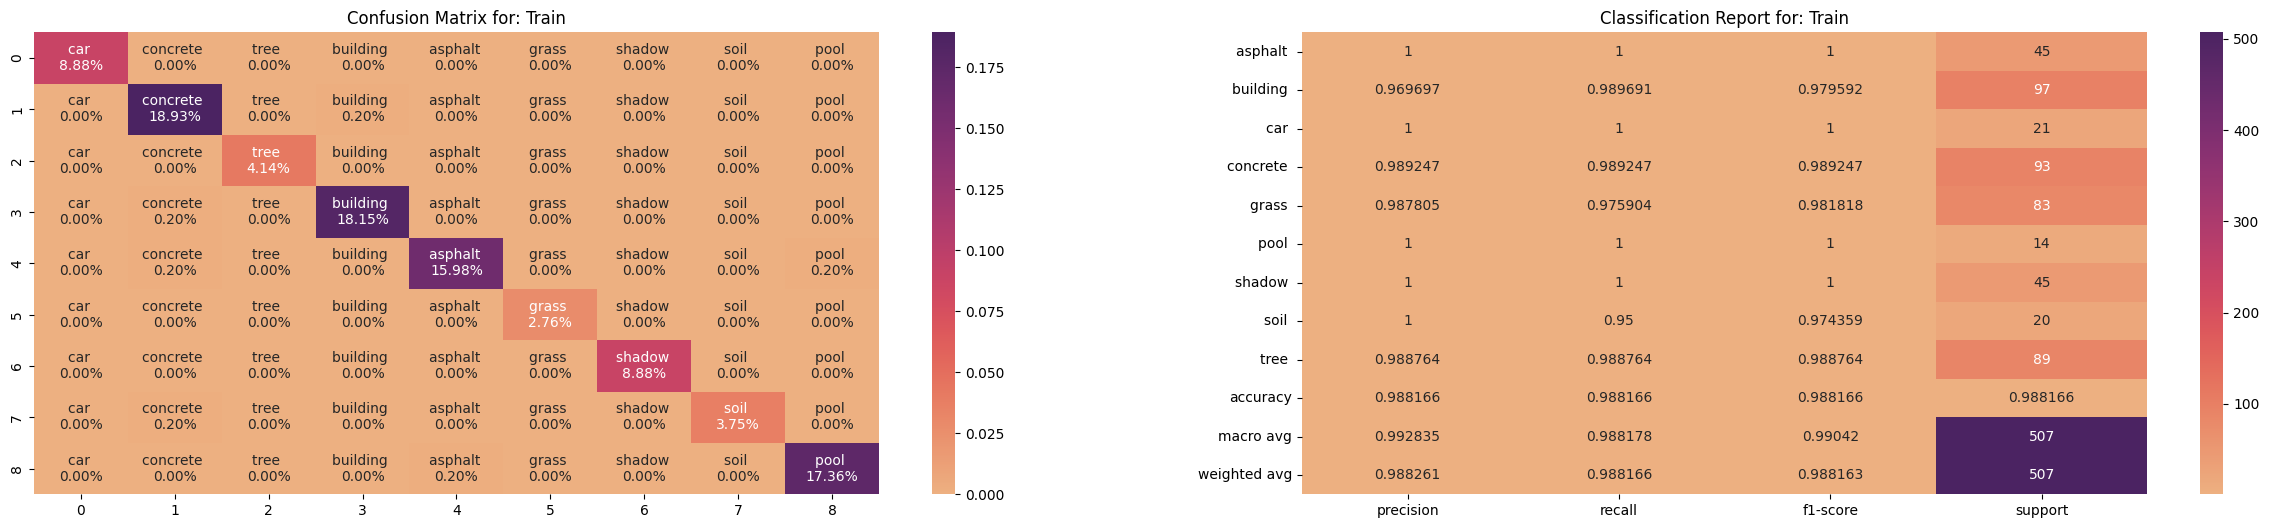

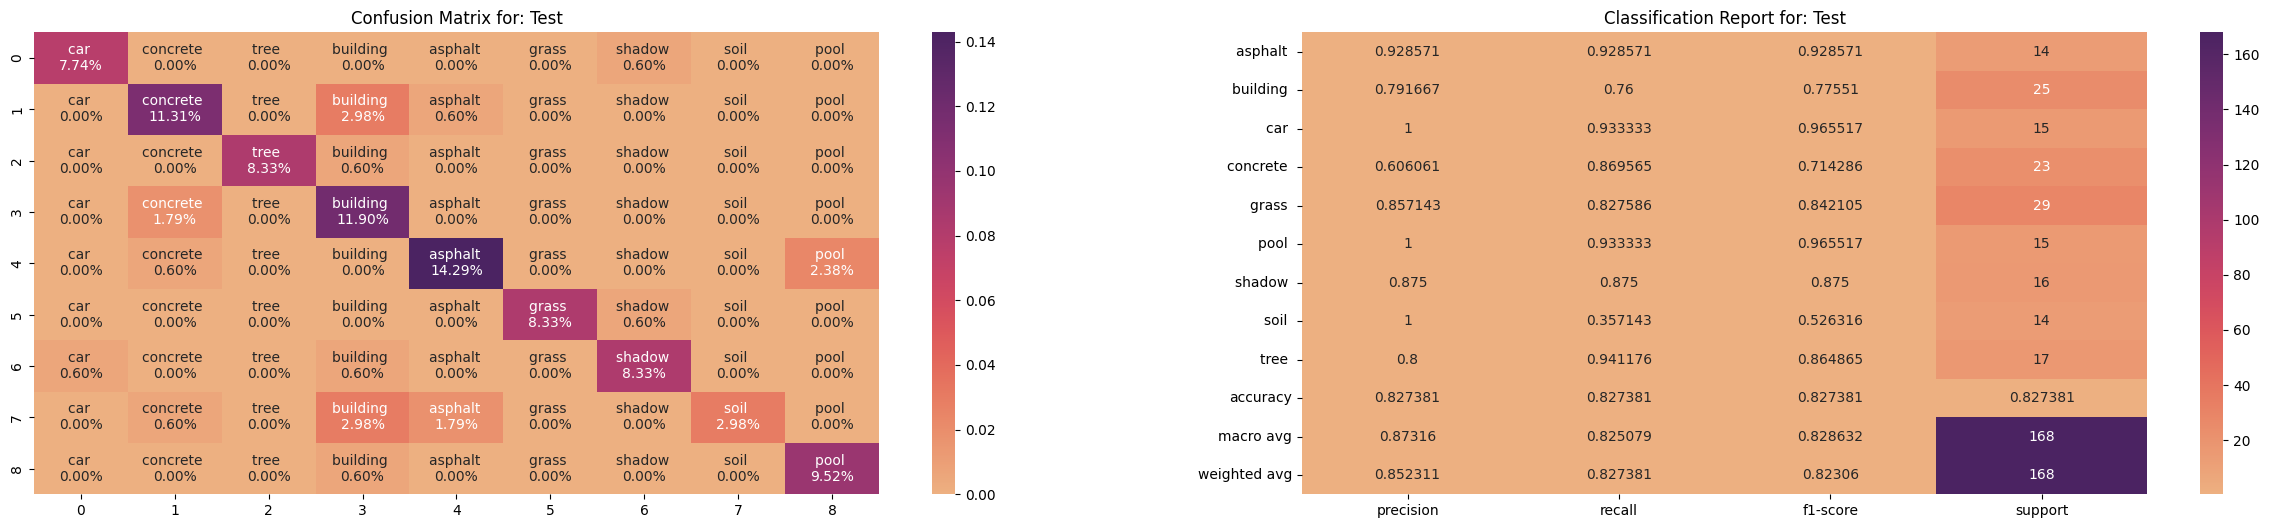

In [57]:
rbfsvm,rbfsvm_params = model_results(SVC(kernel='rbf',random_state=42),X_train_scaled,X_test_scaled,y_train,y_test,column_names,grid_search=True,parameters=[{"C":np.arange(0.01,10.2,0.2),'gamma':[0.01,0.1,1,10,100]}],feature_importance=False)

It looks like the model might be overfitting on certain classes.

In [58]:
rbfsvm_params

{'C': 2.81, 'gamma': 0.01}

## Conceptual Questions

#### 1) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

Looking at the model outputs, It is quite evident that the SVM with a linear kernel is the best performing model. Random Forests, LinearSVC, SVM with poly kernel and SVM with rbf kernel are all overfitting on the train data. This is evident because the classification reports for all of them show stats of, or almost 100%, which indicates overfitting.  

#### 2) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 

Polynomial or RBF Kernels are used when the data is linearly inseperable. Linear kernels work on creating creating a straight line/plane to separate points, but when the points cannot be seperated linearly you would need to either use a polynomial kernel, which would find the polynomial features and try to seperate on that or use an rbf kernel which finds the closes neighbors for a point.

One problem with the polynomial kernel is that it may suffer from numerical instability: when $x^{T}y + c < 1, K(x, y) = (x^{T}y + c)^{d}$ tends to zero with increasing $d$, whereas when $x^{T}y + c > 1, K(x, y)$ tends to infinity.



#### 3) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. The C parameter is very important in fine-tuning your hyperplane when the data is linearly seperable. It is essentially your trade-off between classification errors or generalization. it is of special concern when trying to avoid overfitting. 

#### 4) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features. As we can see from the below description of the training data set, BrdIndx has a max of 4.53 and a mean or 2.03, while the next feature Area has a mean of 562.5 and a max of 5767. The disparity between these two features is huge and the hyperparameter would definitely be more influenced by the Area feature and not the BrdIndx feature. Thus we should regularize or standardize the dataset.

In [59]:
train_data.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,...,24.601144,2.931657,0.817712,0.597732,8.048698,1.455838,0.653905,0.027436,1398.706114,1101.998185
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,...,12.203441,4.942887,0.106007,0.197505,0.787912,0.451781,0.251287,0.133834,1097.323462,533.927869
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.240000,0.030000,-0.360000,34.000000,211.270000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,...,14.485000,1.375000,0.770000,0.455000,7.370000,1.160000,0.470000,-0.080000,601.000000,726.745000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,...,22.380000,1.920000,0.840000,0.610000,8.020000,1.440000,0.710000,-0.020000,1148.000000,1011.230000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,...,33.825000,2.800000,0.890000,0.760000,8.750000,1.775000,0.860000,0.145000,1874.000000,1335.640000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3619.280000


#### 5) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

Kernel methods are types of algorithms that are used for pattern analysis. SVM uses these kernels as a transformation layer to create new features(projecting on a new dimension) that can be used to seperate linearly on the dataset.